# Nonnegative matrix factorization

A derivative work by Judson Wilson, 6/2/2014.    
Adapted from the CVX example of the same name, by Argyris Zymnis, Joelle Skaf and Stephen Boyd

## Introduction

We are given a matrix $A \in \mathbf{\mbox{R}}^{m \times n}$ and are interested in solving the problem:
    \begin{array}{ll}
    \mbox{minimize}   & \| A - YX \|_F \\
    \mbox{subject to} & Y \succeq 0 \\
                      & X \succeq 0,
    \end{array}
where $Y \in \mathbf{\mbox{R}}^{m \times k}$ and $X \in \mathbf{\mbox{R}}^{k \times n}$.

This example generates a random matrix $A$ and obtains an
*approximate* solution to the above problem by first generating
a random initial guess for $Y$ and then alternatively minimizing
over $X$ and $Y$ for a fixed number of iterations.

## Generate problem data

In [6]:
import cvxpy as cvx
import numpy as np

# Ensure repeatably random problem data.
np.random.seed(0)

# Generate random data matrix A.
m = 10
n = 12
k = 5
A = np.random.rand(m, k).dot(np.random.rand(k, n))

# Initialize Y randomly.
Y_init = np.random.rand(m, k)

In [8]:
A.shape

(10, 12)

## Perform alternating minimization

In [7]:
# Ensure same initial random Y, rather than generate new one
# when executing this cell.
Y = Y_init 

# Perform alternating minimization.
MAX_ITERS = 30
residual = np.zeros(MAX_ITERS)
for iter_num in range(1, 1+MAX_ITERS):
    # At the beginning of an iteration, X and Y are NumPy
    # array types, NOT CVXPY variables.

    # For odd iterations, treat Y constant, optimize over X.
    if iter_num % 2 == 1:
        X = cvx.Variable(k, n)
        constraint = [X >= 0]
    # For even iterations, treat X constant, optimize over Y.
    else:
        Y = cvx.Variable(m, k)
        constraint = [Y >= 0]
    
    # Solve the problem.
    obj = cvx.Minimize(cvx.norm(A - Y*X, 'fro'))
    prob = cvx.Problem(obj, constraint)
    prob.solve(solver=cvx.SCS)

    if prob.status != cvx.OPTIMAL:
        raise Exception("Solver did not converge!")
    
    print 'Iteration {}, residual norm {}'.format(iter_num, prob.value)
    residual[iter_num-1] = prob.value

    # Convert variable to NumPy array constant for next iteration.
    if iter_num % 2 == 1:
        X = X.value
    else:
        Y = Y.value

Iteration 1, residual norm 3.24879764159
Iteration 2, residual norm 0.498666327194
Iteration 3, residual norm 0.256741647803
Iteration 4, residual norm 0.222241855794
Iteration 5, residual norm 0.199188948872
Iteration 6, residual norm 0.181505574849
Iteration 7, residual norm 0.164861624561
Iteration 8, residual norm 0.150336849144
Iteration 9, residual norm 0.138672475089
Iteration 10, residual norm 0.125661888846
Iteration 11, residual norm 0.114364231652
Iteration 12, residual norm 0.103670244204
Iteration 13, residual norm 0.0938519558184
Iteration 14, residual norm 0.0857160986381
Iteration 15, residual norm 0.077749471693
Iteration 16, residual norm 0.0714573254353
Iteration 17, residual norm 0.0656797221263
Iteration 18, residual norm 0.0603970245378
Iteration 19, residual norm 0.0566480483336
Iteration 20, residual norm 0.0523039308043
Iteration 21, residual norm 0.0489619508605
Iteration 22, residual norm 0.0454965319419
Iteration 23, residual norm 0.0417269486266
Iteration 2

## Output results

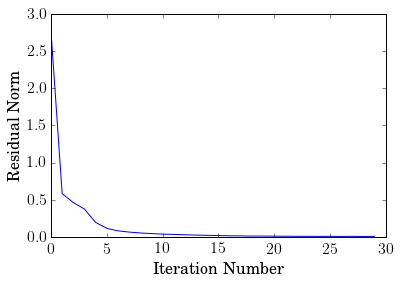

Original matrix:
[[ 1.323426    1.11061189  1.69137835  1.20020115  1.13216889  0.5980743
   1.64965406  0.340611    1.69871738  0.78278448]
 [ 1.73721109  1.40464204  1.90898877  1.60774132  1.53717253  0.62647405
   1.76242265  0.41151492  1.8048194   1.20313124]
 [ 1.4071438   1.10269406  1.75323063  1.18928983  1.23428169  0.60364688
   1.63792853  0.40855006  1.57257432  1.17227344]
 [ 1.3905141   1.33367163  1.07723947  1.67735654  1.33039096  0.42003169
   1.22641711  0.21470465  1.47350799  0.84931787]
 [ 1.42153652  1.13598552  2.00816457  1.11463462  1.17914429  0.69942578
   1.90353699  0.45664487  1.81023916  1.09668578]
 [ 1.60813803  1.23214532  1.73741086  1.3148874   1.27589039  0.40755835
   1.31904948  0.3469129   1.34256526  0.76924618]
 [ 0.90607895  0.6632877   1.25412229  0.81696721  0.87218892  0.50032884
   1.245879    0.25079329  1.25017792  0.72155621]
 [ 1.5691922   1.47359672  1.76518996  1.66268312  1.43746574  0.72486628
   1.97409333  0.39239642  2.092348

In [3]:
#
# Plot residuals.
#

import matplotlib.pyplot as plt

# Show plot inline in ipython.
%matplotlib inline

# Set plot properties.
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Create the plot.
plt.plot(residual)
plt.xlabel('Iteration Number')
plt.ylabel('Residual Norm')
plt.show()

#
# Print results.
#
print 'Original matrix:'
print A
print 'Left factor Y:'
print Y
print 'Right factor X:'
print X
print 'Residual A - Y * X:'
print A - Y * X
print 'Residual after {} iterations: {}'.format(iter_num, prob.value)
